In [4]:
win_data = "win/part-00000-0aaa3e21-4672-4645-a8d5-247fb021ded3-c000.csv"
head_to_head_data = "lose/part-00001-fbbf270b-65a3-447b-b4b7-3601a2518a80-c000.csv"
json_path = "/home/hpham/hero.json"

In [5]:
import json

def parse_hero_id():
    with open(json_path) as json_data:
        raw_json = json.load(json_data)
        heroes = raw_json['heroes']
        return [x['id'] for x in heroes]

In [6]:
import csv

In [7]:
hero = parse_hero_id()

win_matrix = {}
head_to_head_matrix = {}

for i in range(0, len(hero)):
    if hero[i] not in win_matrix:
        win_matrix[hero[i]] = {}
    if hero[i] not in head_to_head_matrix:
        head_to_head_matrix[hero[i]] = {}
    for j in range(0, len(hero)):
        win_matrix[hero[i]][hero[j]] = 0
        head_to_head_matrix[hero[i]][hero[j]] = (0, 0)
        
with open(win_data, 'r') as winFile:
    data = csv.reader(winFile)
    for row in data:
        newRow = [int(row[0]), int(row[1]), float(row[2]) * 100]
        win_matrix[newRow[0]][newRow[1]] = newRow[2]
        if newRow[1] > newRow[0]:
            win_matrix[newRow[1]][newRow[0]] = newRow[2]
            
with open(head_to_head_data, 'r') as head_to_head_csv:
    data = csv.reader(head_to_head_csv)
    for row in data:
        newRow = [int(row[0]), int(row[1]), float(row[2]) * 100, float(row[3]) * 100]
        head_to_head_matrix[newRow[0]][newRow[1]] = (newRow[2], newRow[3])

In [8]:
import matplotlib.pyplot as plt

def displayWinByHero(hero_id, teammate=hero):
    win_rate = win_matrix[hero_id]
#     print(win_rate)
    value = [win_rate[x] for x in teammate]
    
    plt.figure(figsize=(20, 10), dpi=300)
    plt.bar(teammate, value, align='center')
    plt.xticks(teammate, [str(x) for x in teammate])
    plt.show()

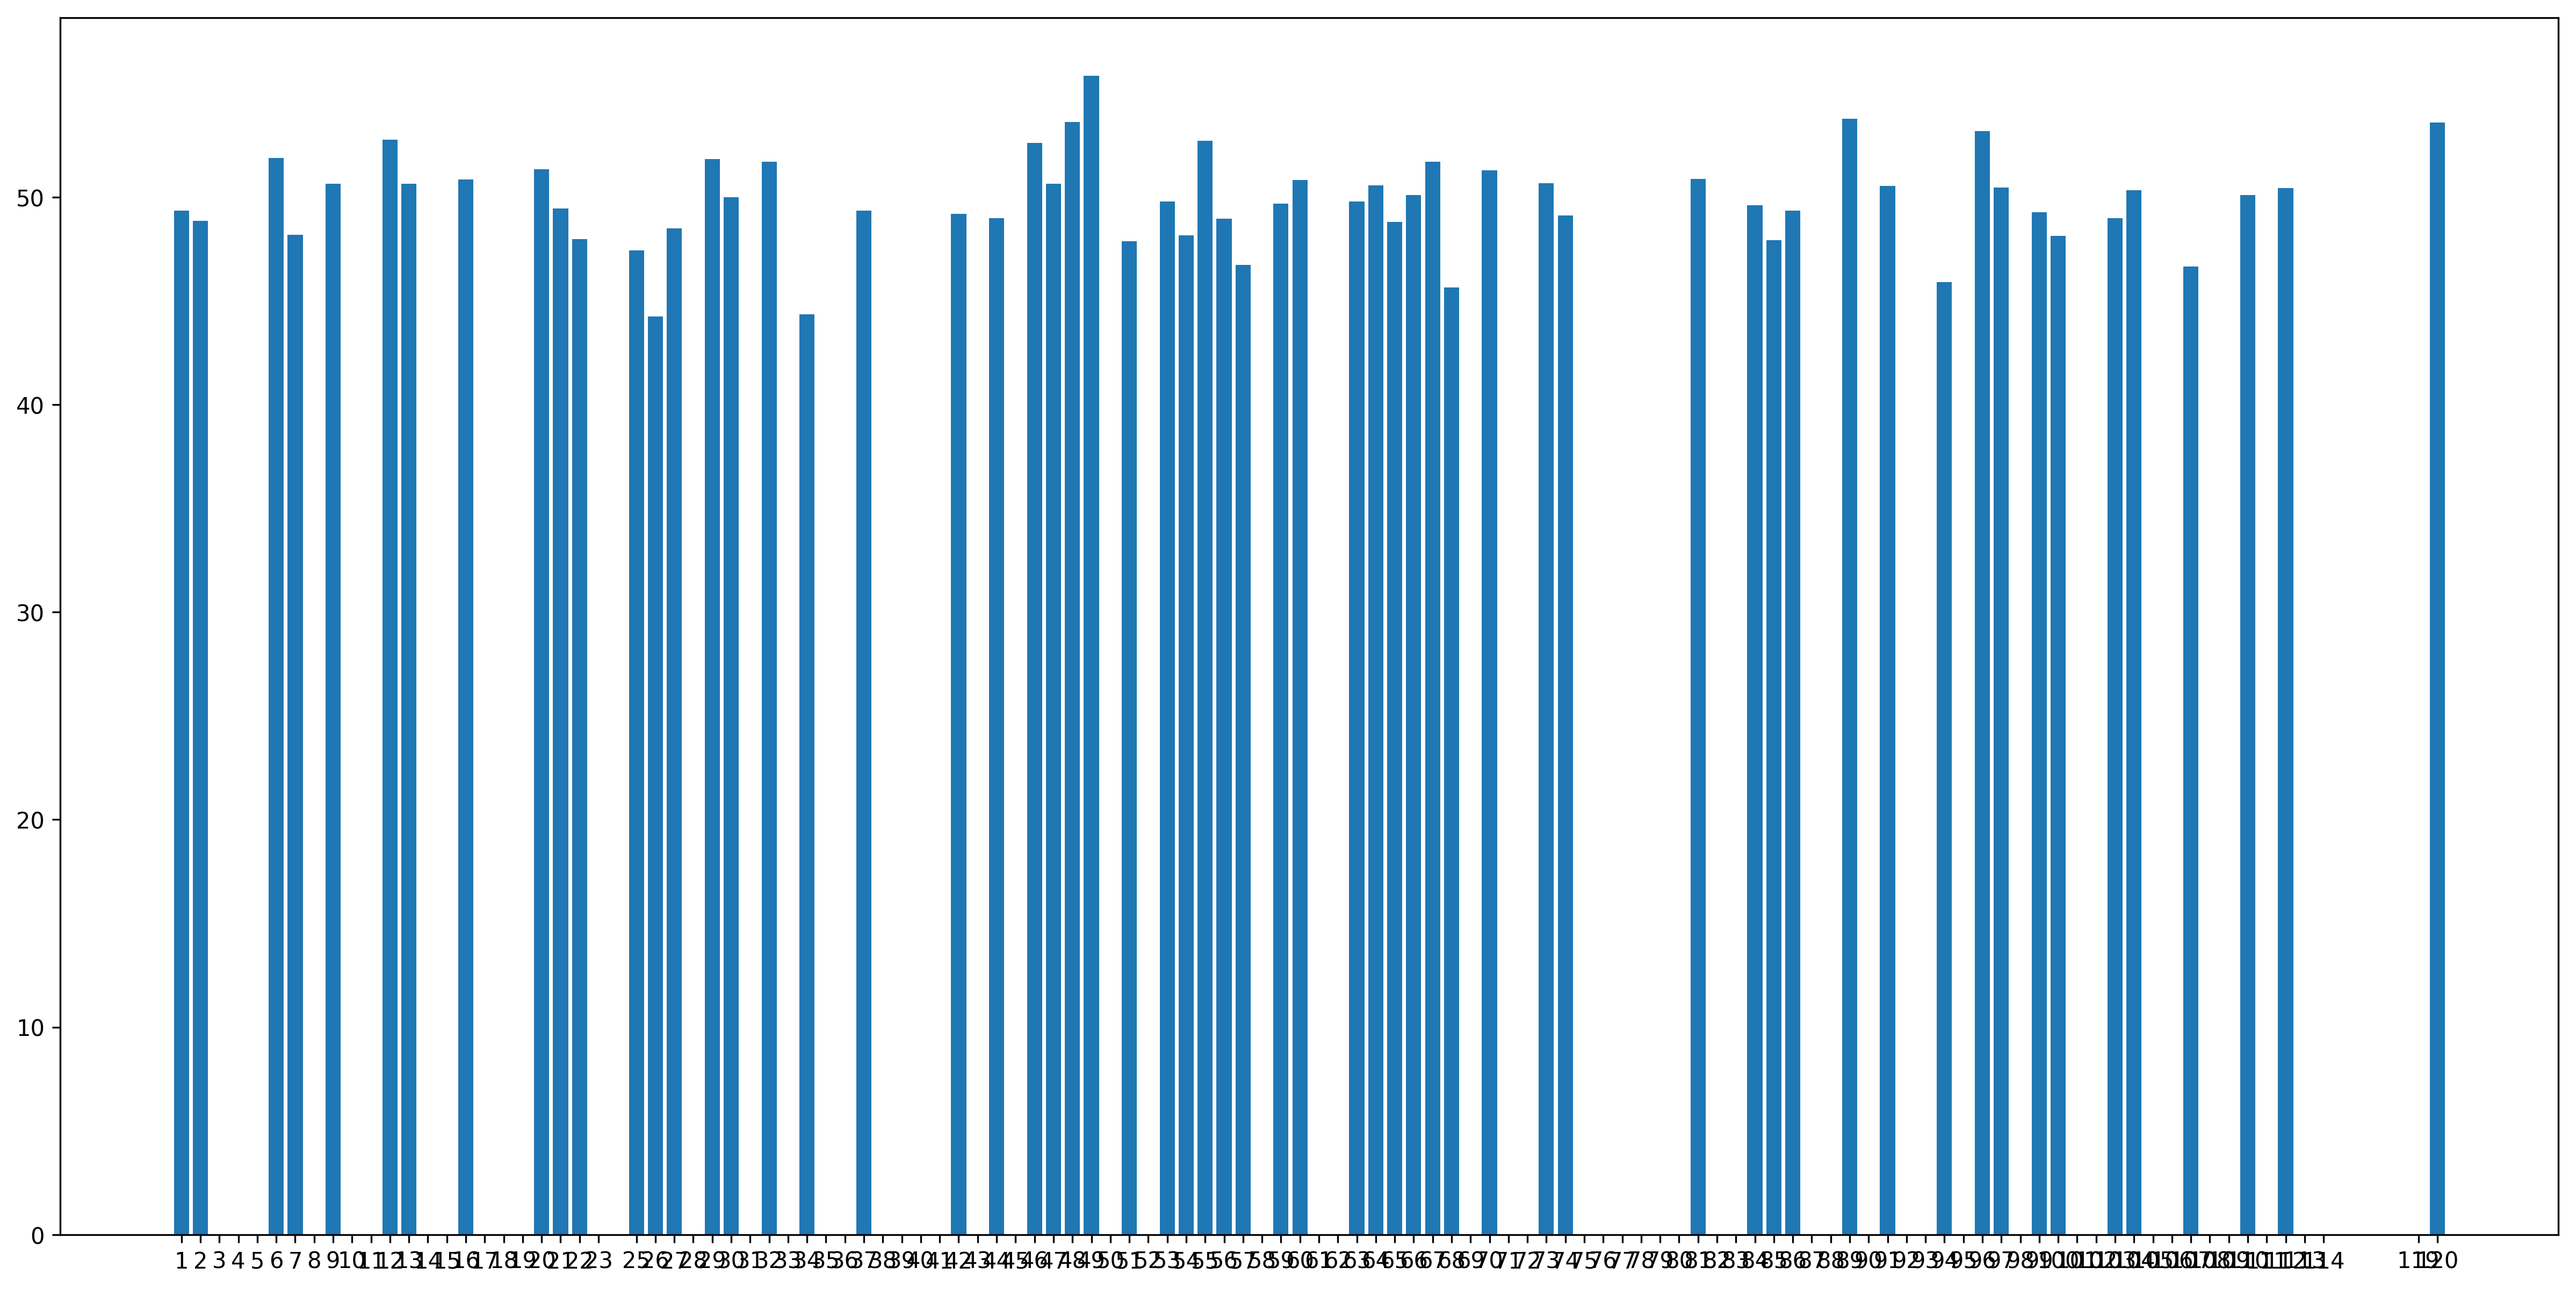

In [10]:
displayWinByHero(8)

In [33]:
def displayWinRateAgainst(hero_id, enemy=hero, isWin=True):
    record_against = head_to_head_matrix[hero_id] # {heroid: (win, lose)}
    
    rate = [x[0] for x in record_against.values()] if isWin else [x[1] for x in record_against.values()]
    
    plt.figure(figsize=(20, 10), dpi=300)
    plt.bar(enemy, list(rate), align='center')
    plt.xticks(enemy, [str(x) for x in enemy])
    plt.show()    

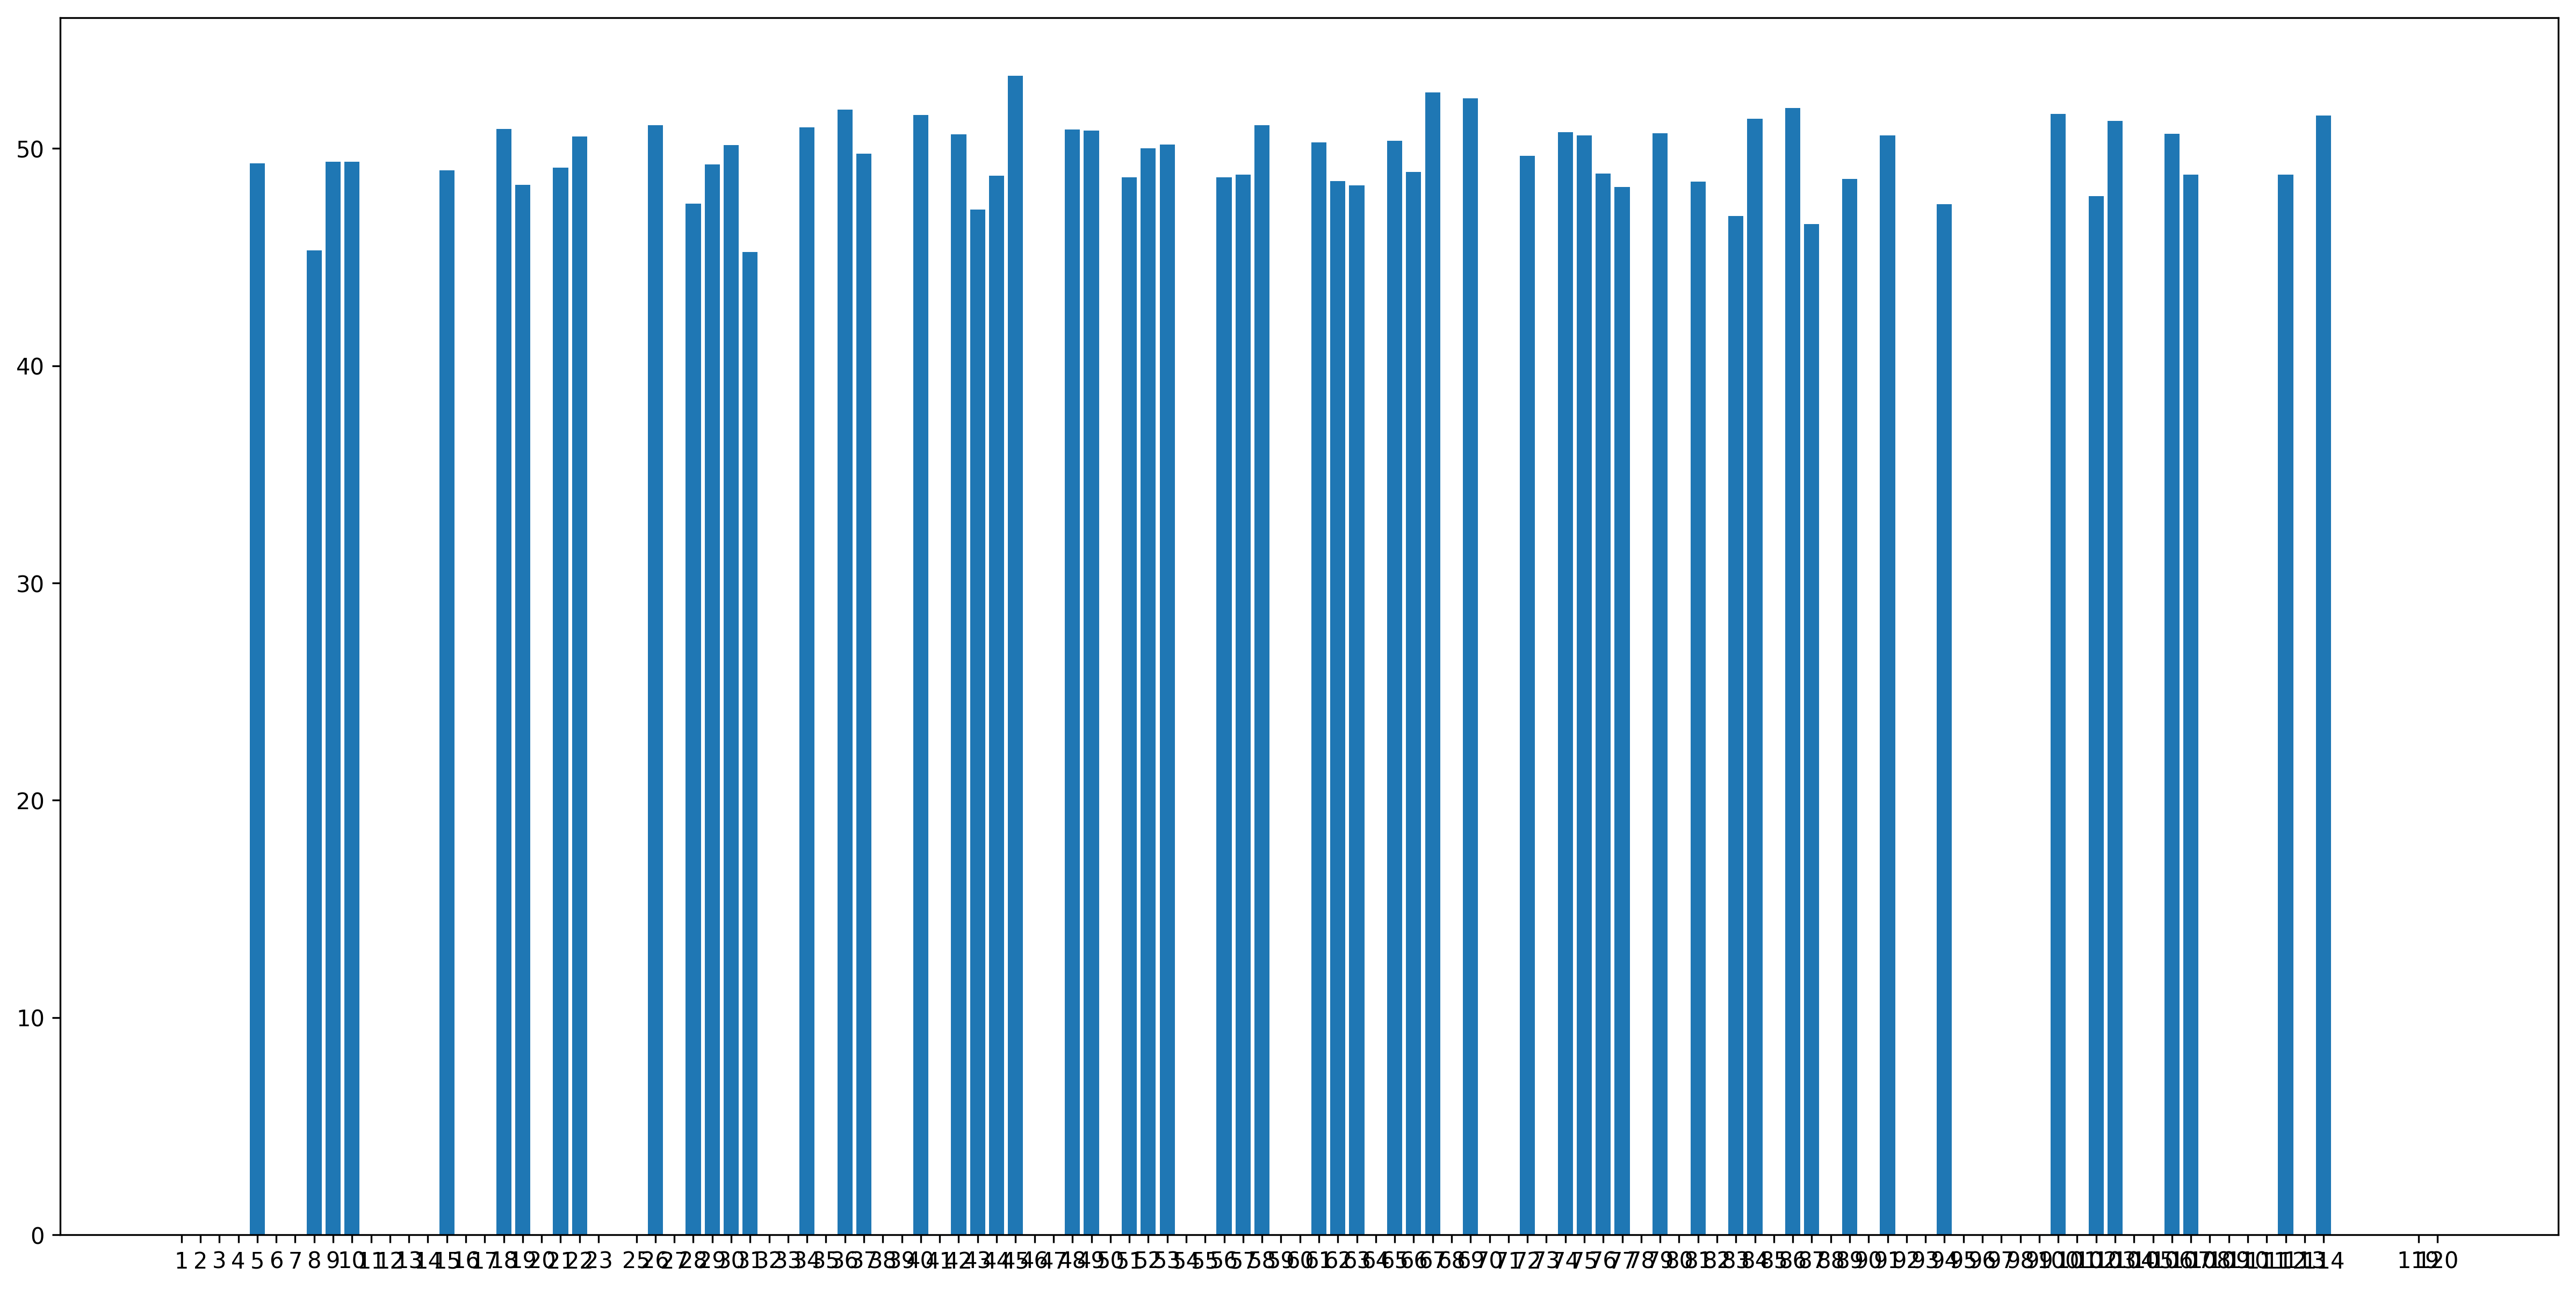

In [34]:
displayWinRateAgainst(12)

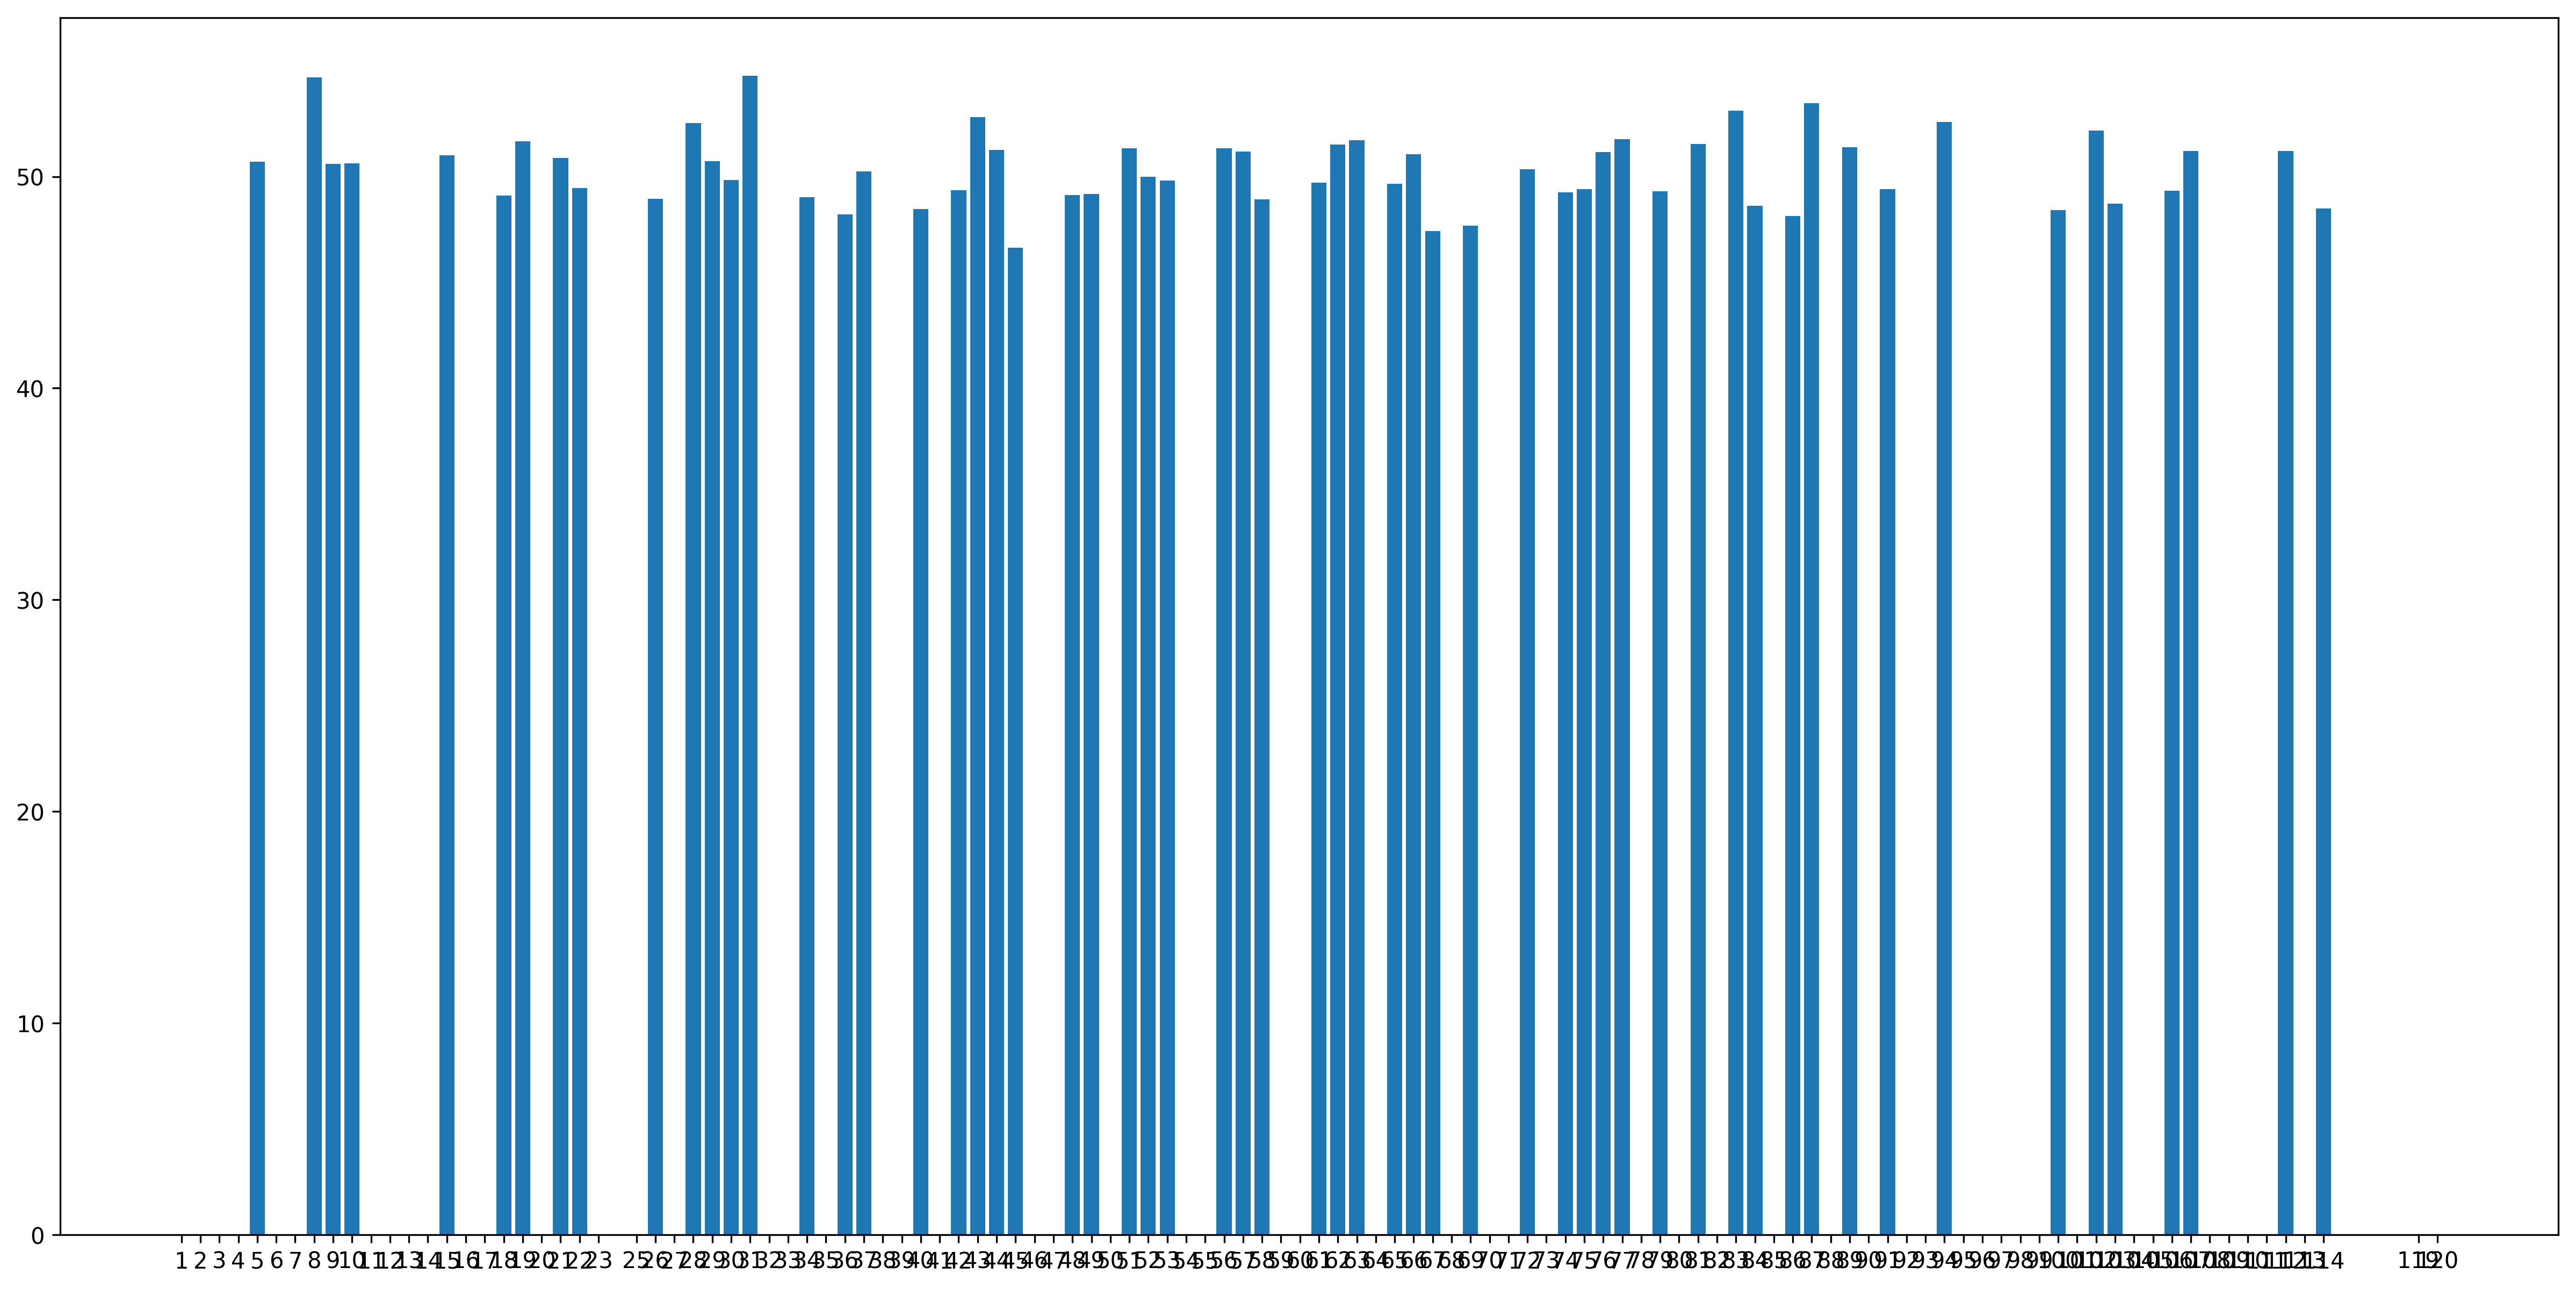

In [35]:
displayWinRateAgainst(12, isWin=False)